# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

872317ee75871266bdc3821916ebf76e


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['port elizabeth', 'rikitea', 'palabuhanratu', 'pokosnoye', 'ushuaia', 'new norfolk', 'tahoua', 'santa isabel do rio negro', 'lasa', 'atuona', 'qaanaaq', 'zhezkazgan', 'taolanaro', 'cayenne', 'cidreira', 'thompson', 'mbuji-mayi', 'ao luk']


In [3]:
# Create a dataframe based on the list of cities.
cities_df = pd.DataFrame(cities, columns =['Cities']) 
cities_df

,Cities
0,port elizabeth
1,rikitea
2,palabuhanratu
3,pokosnoye
4,ushuaia
5,new norfolk
6,tahoua
7,santa isabel do rio negro
8,lasa
9,atuona


In [58]:
# Add columns to the dataframe for storing values from API response.
# Need name, temp_max, humidity, cloudiness, and wind speed from response.
cities_df['Cloudiness'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Long'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""


cities_df

,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,touros,,,,,,,
1,cheuskiny,,,,,,,
2,alaca,,,,,,,
3,garissa,,,,,,,
4,torbay,,,,,,,
5,lewiston,,,,,,,
6,lazaro cardenas,,,,,,,
7,barentsburg,,,,,,,
8,kapaa,,,,,,,
9,mar del plata,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up the inputs to the API call
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": 'Imperial'
}

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # Get city name from df
    q = row['Cities']

    # add keyword to params dict
    params['q'] = q

    # assemble url and make API request
    print(f"Processing record | {q}.")
    response = requests.get(base_url, params=params).json()
    # print(response)
    # print(json.dumps(response, indent=4, sort_keys=True))
       
    try:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Long'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']     
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    
   


Processing record | port elizabeth.
------------
Processing record | rikitea.
------------
Processing record | palabuhanratu.
Missing field/result... skipping.
------------
Processing record | pokosnoye.
------------
Processing record | ushuaia.
------------
Processing record | new norfolk.
------------
Processing record | tahoua.
------------
Processing record | santa isabel do rio negro.
------------
Processing record | lasa.
------------
Processing record | atuona.
------------
Processing record | qaanaaq.
------------
Processing record | zhezkazgan.
------------
Processing record | taolanaro.
Missing field/result... skipping.
------------
Processing record | cayenne.
------------
Processing record | cidreira.
------------
Processing record | thompson.
------------
Processing record | mbuji-mayi.
------------
Processing record | ao luk.
Missing field/result... skipping.
------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Drop rows from dataframe with missing data.
cities_df.dropna(axis=1, how='any')

# Save Data to csv
cities_df.to_csv("citiesData.csv")

In [73]:
cities_df

,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,touros,40,1562644225,100,-5.2,-35.46,71.6,4.7
1,cheuskiny,,,,,,,
2,alaca,0,1562644358,69,40.17,34.84,64.68,2.42
3,garissa,5,1562644358,84,-0.46,39.64,70.38,9.35
4,torbay,20,1562644359,62,47.66,-52.73,60.01,20.8
5,lewiston,1,1562644139,77,44.1,-70.21,66.99,3.36
6,lazaro cardenas,20,1562644359,36,28.39,-105.62,78.8,8.5
7,barentsburg,,,,,,,
8,kapaa,90,1562644360,74,22.08,-159.32,82.4,18.34
9,mar del plata,98,1562644174,76,-46.43,-67.52,43.08,4.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

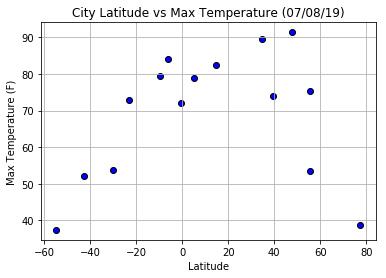

In [9]:
# Add title and labels for each axis.
plt.title("City Latitude vs Max Temperature (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Assign df columns to variables. Urban first:
latX = cities_df['Lat']
maxTempY = cities_df['Max Temp']


# Plot each scatter using the variables.
maxTempScatter = plt.scatter(latX, maxTempY, marker='o', color='blue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsTemp.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

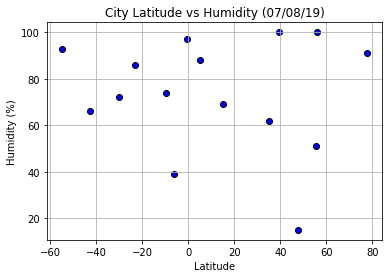

In [10]:
# Add title and labels for each axis.
plt.title("City Latitude vs Humidity (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Assign df columns to variables. Urban first:
latX = cities_df['Lat']
humidityY = cities_df['Humidity']


# Plot each scatter using the variables.
humidityScatter = plt.scatter(latX, humidityY, marker='o', color='blue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsHumid.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Cloudiness Plot

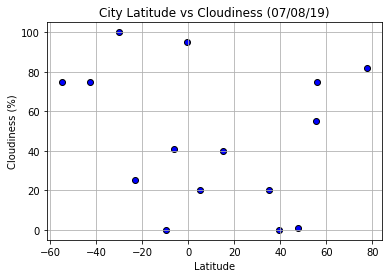

In [11]:
# Add title and labels for each axis.
plt.title("City Latitude vs Cloudiness (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Assign df columns to variables. Urban first:
latX = cities_df['Lat']
cloudinessY = cities_df['Cloudiness']


# Plot each scatter using the variables.
cloudinessScatter = plt.scatter(latX, cloudinessY, marker='o', color='blue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsCloud.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Wind Speed Plot

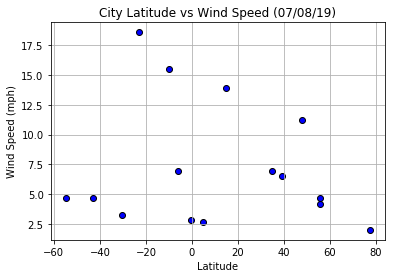

In [12]:
# Add title and labels for each axis.
plt.title("City Latitude vs Wind Speed (07/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Assign df columns to variables. Urban first:
latX = cities_df['Lat']
speedY = cities_df['Wind Speed']


# Plot each scatter using the variables.
windSpeedScatter = plt.scatter(latX, speedY, marker='o', color='blue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsWind.png', bbox_inches='tight')

plt.show()